In [10]:
import numpy as np
import pandas as pd
import plotly
from io import StringIO
pd.options.plotting.backend = "plotly"



In [14]:
lines = open("C:/Users/nkgoe/test_output.log", 'r').readlines()
test_starts = [l_no for l_no, line in enumerate(lines) if "Sample,In,Out" in line]
test_ends = [l_no for l_no, line in enumerate(lines) if "Finished!" in line]
test_start=test_starts[-1]
test_end=test_ends[-1]
data=pd.read_csv(StringIO("".join(lines[test_start:test_end])))
data["Time"] = data.Sample/10000000
data.plot(x="Time", y=["In", "Out"], title="Signal vs. Time: Pre and Post Filter")

<Axes: title={'center': 'Test Duration vs. Filter Order: 2048 Input Samples'}, xlabel='Filter Order', ylabel='Test Duration (microseconds)'>

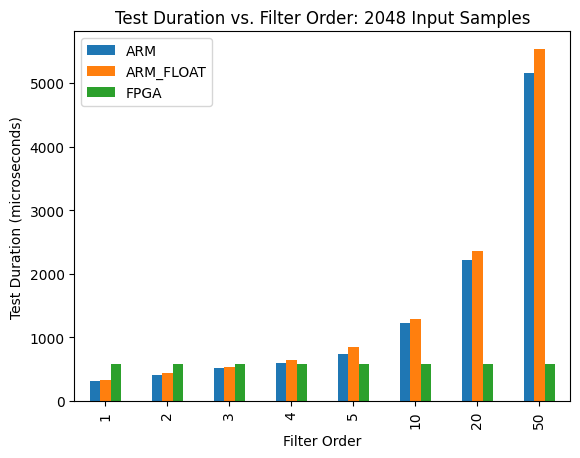

In [9]:
results = pd.read_csv("Results.csv")
results_order = results[results["DataLength"] == 2048]
# results_order.pivot(index="FilterOrder", columns=["ARM","FPGA","ARM_FLOAT"]).plot()
results_order.plot(kind="bar", stacked=False, x="FilterOrder", y=["ARM", "ARM_FLOAT", "FPGA"], xlabel="Filter Order", ylabel="Test Duration (microseconds)", title="Test Duration vs. Filter Order: 2048 Input Samples")

<Axes: title={'center': 'Test Duration vs. # Input Samples: 20th Order FIR'}, xlabel='Input Samples Length', ylabel='Test Duration (microseconds)'>

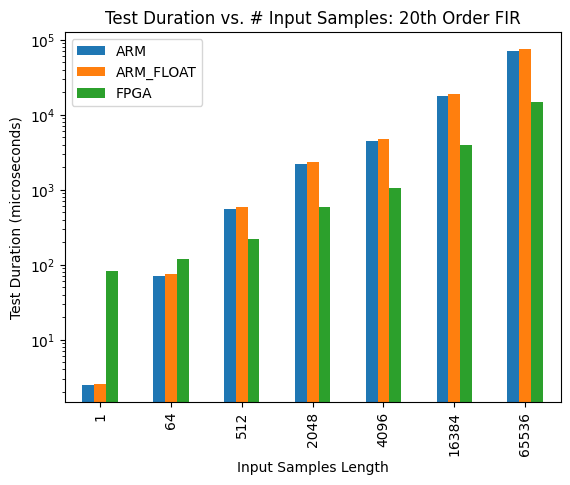

In [8]:

results_length = results[results["FilterOrder"] == 20]
results_length.plot(kind="bar", stacked=False, x="DataLength", y=["ARM", "ARM_FLOAT", "FPGA"], xlabel="Input Samples Length", ylabel="Test Duration (microseconds)", logy=True, title="Test Duration vs. # Input Samples: 20th Order FIR")